# 데이터 탐색
- 어떤 데이터인지 살펴보기

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic')

In [59]:
df = pd.read_csv('rfm_data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
df.describe().round(2)

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,392692.00,392692.00,392692.00,392692.00
mean,560590.88,13.12,3.13,15287.84
std,13087.06,180.49,22.24,1713.54
min,536365.00,1.00,0.00,12346.00
25%,549234.00,2.00,1.25,13955.00
50%,561874.00,6.00,1.95,15150.00
75%,572061.00,12.00,3.75,16791.00
max,581587.00,80995.00,8142.75,18287.00


In [60]:
# 거래당 가격 총합을 나타내는 TotalPrice 컬럼 생성
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [98]:
# 새롭게 추가된 데이터까지 하여 저장
df.to_csv('rfm_data2.csv', date_format='%Y-%m-%d %H:%M:%S', index=False)

In [10]:
# 고객의 수
df['CustomerID'].value_counts()

CustomerID
17841    7676
14911    5670
14096    5111
12748    4412
14606    2677
         ... 
16765       1
13302       1
13270       1
16148       1
17846       1
Name: count, Length: 4338, dtype: int64

In [11]:
# 상품의 수
df['StockCode'].value_counts()

StockCode
85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
          ... 
90059A       1
20678        1
90059D       1
90168        1
23843        1
Name: count, Length: 3665, dtype: int64

In [14]:
# 거래 기간
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [15]:
# 주문 국가
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [34]:
# 국가 별 구매 횟수
countries = df.groupby('Country').agg({'InvoiceNo': 'count'}).reset_index()
countries.rename(columns={'InvoiceNo' : '# of transactions'}, inplace=True)
countries.head()

,Country,# of transactions
0,Australia,1181
1,Austria,398
2,Bahrain,17
3,Belgium,2031
4,Brazil,32


In [61]:
# datetime 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [91]:
# 구매가 가장 많았던 달
df1 = df.copy()
df1['year'] = df1['InvoiceDate'].dt.year
df1['month'] = df1['InvoiceDate'].dt.month_name()
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December


In [92]:
df1 = df1.groupby(by=['year', 'month']).agg({'InvoiceNo' : 'count'}).reset_index()
df1.rename(columns={'InvoiceNo' : '# of transactions'})
df1.head()

,year,month,InvoiceNo
0,2010,December,25670
1,2011,April,22433
2,2011,August,26790
3,2011,December,17026
4,2011,February,19706


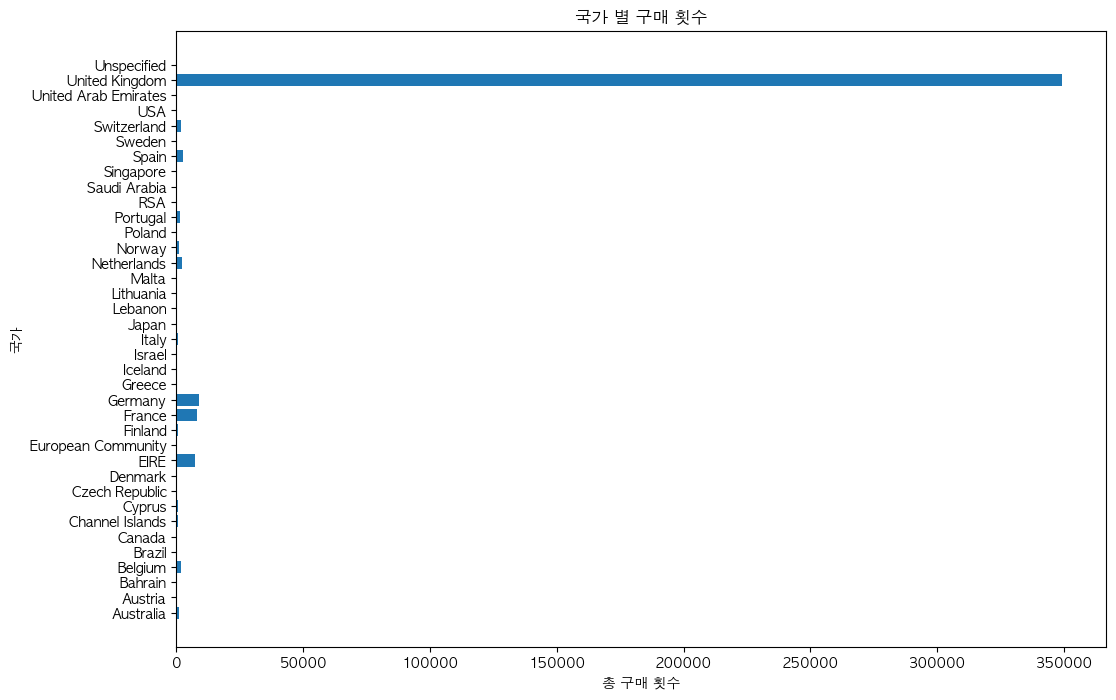

In [86]:
plt.figure(figsize=(12, 8))

plt.barh('Country', '# of transactions', data=countries,)
plt.title('국가 별 구매 횟수')
plt.ylabel('국가')
plt.xlabel('총 구매 횟수')

plt.show()

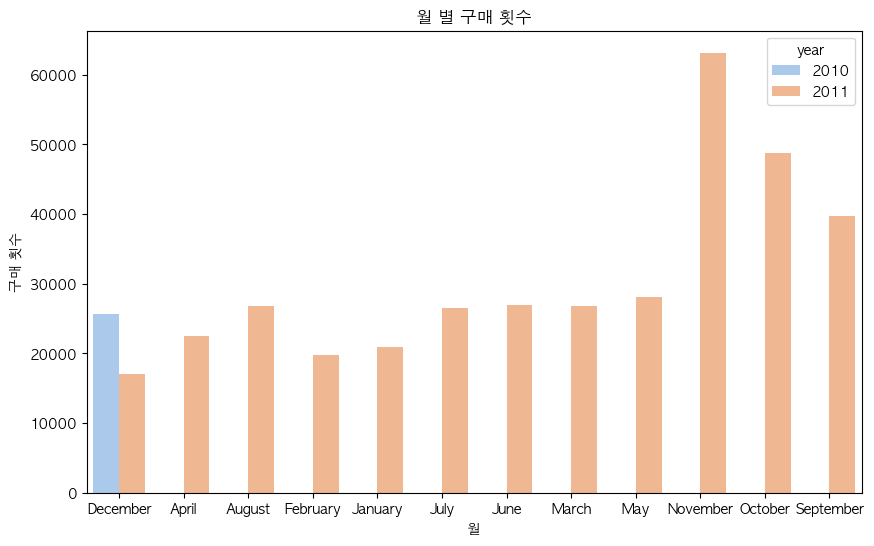

In [96]:
# 월 별 거래 횟수
plt.figure(figsize=(10, 6))

sns.barplot(x='month', y='InvoiceNo', hue='year', data=df1, palette='pastel')
plt.title('월 별 구매 횟수')
plt.xlabel('월')
plt.ylabel('구매 횟수')

plt.show()

## 분석 결과
- 데이터 셋의 리테일 샵은 온라인 소매점이기 때문에 1년 내내 구매할 수 있는 선물을 파는 곳이다.
- 구매가 가장 많은 국가는 영국 - 독일 - 프랑스 순이었다
- 이는 해당 온라인 샵이 영국에 기반한 사업이기 때문에 자국 고객들과 배송이 용이한 인근 유럽 국가들에게 인기가 가장 많은 것으로 보인다.

- 월 별 구매 횟수는 11월이 가장 높았다.
- 2010년 12월부터의 데이터이기 때문에 12월의 구매 횟수만 존재한다.
- 이를 차치하고 보더라도, 11월 - 10월 순이 높았는데 이는 11월에는 추수감자절이 있고, 10월에는 할로윈, 9월에는 새학기의 시작이기 때문으로 보인다.